## Softmax Regression

In [13]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.6, 7)

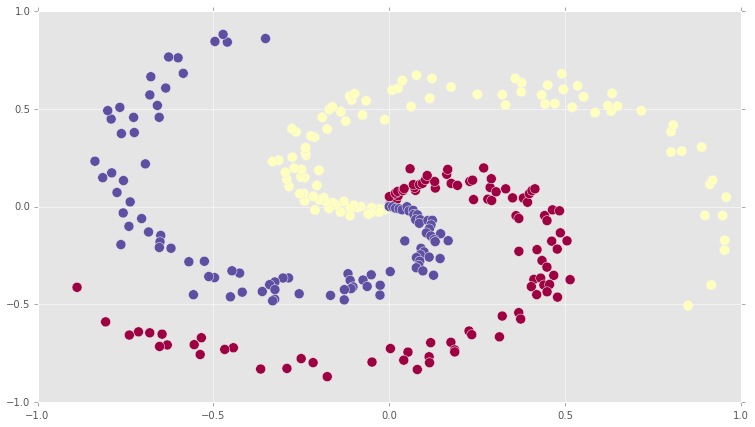

In [12]:
# generate some synthetic data 
# modified version given in http://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_data = np.zeros((N*K,D))
y_data = np.zeros(N*K, dtype='uint8')
for j in xrange(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N)
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X_data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y_data[ix] = j
fig = plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

### Training the logistic classifier using Tensorflow

epoch: 0  cost: 1.089877
epoch: 100  cost: 0.817562
epoch: 200  cost: 0.786621
epoch: 300  cost: 0.779160
epoch: 400  cost: 0.776784
epoch: 500  cost: 0.775917
epoch: 600  cost: 0.775577
epoch: 700  cost: 0.775437
epoch: 800  cost: 0.775378
epoch: 900  cost: 0.775353
training set accuracy: 0.493333


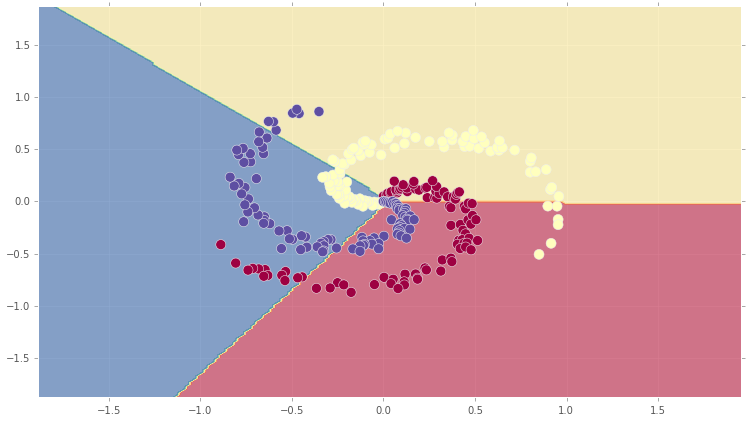

In [11]:
# creating placeholders for X and y
X = tf.placeholder("float", shape=[None, 2])
y = tf.placeholder("float", shape=[None, 3])

one_hot = np.zeros((N*K, 3))
one_hot[range(N*K), y_data] = 1

epochs =  1000
learning_rate = 0.001
print_loss_in_steps = 100


# creating model parameters
W = tf.Variable(tf.zeros([2, 3]))
b = tf.Variable(tf.zeros([3]))

output = tf.nn.softmax(tf.matmul(X, W) +  b)
loss = -tf.reduce_sum(y*tf.log(output))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as session:
    session.run(tf.initialize_all_variables())
    for i in range(epochs):
        optimizer.run(feed_dict={X:X_data, y:one_hot})
        cost = session.run(loss, feed_dict={X:X_data, y:one_hot})/(N*K)
        if i % print_loss_in_steps == 0:
            print "epoch: %d  cost: %f" %(i, cost)
    correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(one_hot,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "training set accuracy: %f" %(accuracy.eval({X: X_data, y: one_hot}))
    
    
    h = 0.02
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], session.run(W)) + session.run(b)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())